# Assignment 5. PCA (5%)

### In this assignment, you will use the survey dataset to perform the PCA on 18 Attitude features on posttest to reduce their dimensionality.   

### Datasets
#### "merge_survey.csv"
#### "Assign3_summary.csv"

## Q1. (1%)
### Merge the survey data and summary data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
# Check the current working directory and set options to show all the columns in the data
os.getcwd()
pd.set_option('display.max_columns', None)

In [3]:
# Load the datasets
df_survey = pd.read_csv("merge_survey.csv")
df_summary = pd.read_csv("Assign3_summary.csv")

In [4]:
## Q1.1 Merge df_survey (by ID) and df_summary (by UserID), using right join. (0.2%)
#Convert ID to lowercase and rename UserID
df_survey['UserID'] = df_survey['ID'].str.lower()

In [5]:
df = pd.merge(df_survey, df_summary, how='right', on='UserID')

# Display the first few rows of the merged dataset
df.head()

,StartDate_pre,EndDate_pre,Finished_pre,Consent,Turker_pre,MTID,Age,Sex,ethnicity,CountrBorn,CountrStay,Language,EngYear,EngCoun,Howlong,Edu,Major,Status,Job,StudyFurth,Reading,Summary,Typing,Computer_1,Computer_2,Computer_3,Computer_4,TimeComput_1,TimeComput_2,TimeComput_3,TimeComput_4,SumPercep_1,SumPercep_2,SumPercep_3,SumPercep_4,SumPercep_5,SumPercep_6,TimeSumPer_1,TimeSumPer_2,TimeSumPer_3,TimeSumPer_4,SumEffec_1,SumEffec_2,SumEffec_3,SumEffec_4,SumEffec_5,SumEffec_6,SumEffec_7,SumEffec_8,SumEffec_9,SumEffec_10,SumEffec_11,TimeSumEff_1,TimeSumEff_2,TimeSumEff_3,TimeSumEff_4,Dog,Dog1,Dog2,Dog3,TimeDog_1,TimeDog_2,TimeDog_3,TimeDog_4,JobFair,JobFair1,JobFair2,JobFair3,TimeJobFai_1,TimeJobFai_2,TimeJobFai_3,TimeJobFai_4,Chocolate,Chocolate1,Chocolate2,Chocolate3,Chocolate4,TimeChocol_1,TimeChocol_2,TimeChocol_3,TimeChocol_4,ResponseTime_pre,StartDate_post,EndDate_post,Finished_post,ID,Turker_post,Efficacy_1,Efficacy_2,Efficacy_3,Efficacy_4,Efficacy_5,Efficacy_6,Efficacy_7,Efficacy_8,Efficacy_9,Efficacy_10,Efficacy_11,Attitude_1,Attitude_2,Attitude_3,Attitude_4,Attitude_5,Attitude_6,Attitude_7,Attitude_8,Attitude_9,Attitude_10,Attitude_11,Attitude_12,Attitude_13,Attitude_14,Attitude_15,Attitude_16,Attitude_17,Attitude_18,Good,Bad,ResponseTime_post,FinishSurvey,Ethnicity,Asian,Edu_grp,UserID,RecordID,ClassID,LessonID,TotalTime,XML,Q1Data,Q2Data,Q3Data,Q4Data,Q5Data,Q6Data,Q7Data,Q8Data,Q9Data,Q1Duration,Q2Duration,Q3Duration,Q4Duration,WritingTime,Q6Duration,Q7Duration,Q8Duration,Q9Duration,MaxAttempt,Test,WritingTime_m,WritingTime_m_log,WritingTime_m_scaled
0,2015-09-09 12:02:00,2015-09-09 12:44:00,1.0,1.0,1.0,A1XIIHV1GTI97H,31,2,5.0,INDIA,INDIA,2.0,28,1.0,1,Master,Masters in Computer Science & Information Tech...,1.0,Software Developer,1.0,1.0,1.0,3.0,7.0,7.0,4.0,4.0,"15,156","37,901","38,839",4.0,4.0,6.0,6.0,5.0,5.0,4.0,"56,22","91,646","92,44",8.0,6.0,6.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,"8,822","96,552","98,561",18.0,1.0,0.0,1.0,1.0,"9,345","328,133","330,782",4.0,1.0,0.0,1.0,1.0,"94,908","303,245","308,102",3.0,1.0,1.0,1.0,1.0,0.0,"203,646","989,298","991,446",4.0,0 days 00:42:00,2015-09-25 12:00:00,2015-09-25 12:42:00,1.0,FORMAL10_01,1.0,5.0,6.0,5.0,6.0,6.0,1.0,5.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,4.0,6.0,6.0,The system was really and well designed the sy...,"I found a disadvantage, when we face slow inte...",0 days 00:42:00,Both,Asian,1.0,Bachelor above,formal10_01,45,formal,lesson10,1745.662,Lesson10-Butterfly.xml,Next,Arousal5_Pleasant5,4,5,Butterflies and moths have many things in comm...,4.0,4.0,4.0,4.0,115.203,16.265,7.500,6.531,1442.9220,13.859,38.921,42.390,13.734,1,Posttest,920.9375,6.825392,0.223188
1,2015-09-09 12:02:00,2015-09-09 12:44:00,1.0,1.0,1.0,A1XIIHV1GTI97H,31,2,5.0,INDIA,INDIA,2.0,28,1.0,1,Master,Masters in Computer Science & Information Tech...,1.0,Software Developer,1.0,1.0,1.0,3.0,7.0,7.0,4.0,4.0,"15,156","37,901","38,839",4.0,4.0,6.0,6.0,5.0,5.0,4.0,"56,22","91,646","92,44",8.0,6.0,6.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,"8,822","96,552","98,561",18.0,1.0,0.0,1.0,1.0,"9,345","328,133","330,782",4.0,1.0,0.0,1.0,1.0,"94,908","303,245","308,102",3.0,1.0,1.0,1.0,1.0,0.0,"203,646","989,298","991,446",4.0,0 days 00:42:00,2015-09-25 12:00:00,2015-09-25 12:42:00,1.0,FORMAL10_01,1.0,5.0,6.0,5.0,6.0,6.0,1.0,5.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,4.0,6.0,6.0,The system was really and well designed the sy...,"I found a disadvantage, when we face slow inte...",0 days 00:42:00,Both,Asian,1.0,Bachelor above,formal10_01,42,formal,lesson2,1174.839,Lesson2-Flood.xml,Next,Arousal5_Pleasant8,1,3,Floods Disaster Floods are second vulnerable o...,5.0,5.0,4.0,4.0,362.515,13.656,272.093,501.547,15.6710,7.687,40.343,11.125,10.750,3,Pretest,2897.7195,7.971679,0.712757
2,2015-09-09 12:02:00,2015-09-09 12:44:00,1.0,1.0,1.0,A1XIIHV1GTI97H,31,2,5.0,INDIA,INDIA,2.0,28,1.0,1,Master,Masters in Computer Science & Information Tech...,1.0,Softw

In [6]:
print(df.shape)


(731, 152)


In [7]:
## Q1.2 Delete all the unmatched survey data points. (0.2%)
#### Note. If the summary data doesn't have matched survey data, still keep it.
attitude_columns = ['Attitude_1', 'Attitude_2', 'Attitude_3', 'Attitude_4', 'Attitude_5',
                    'Attitude_6', 'Attitude_7', 'Attitude_8', 'Attitude_9', 'Attitude_10',
                    'Attitude_11', 'Attitude_12', 'Attitude_13', 'Attitude_14', 'Attitude_15',
                    'Attitude_16', 'Attitude_17', 'Attitude_18']

summary_columns = df_summary.columns.tolist()

# Ensure 'UserID' is in the list of columns to keep (if not already included in summary_columns)
if 'UserID' not in summary_columns:
    summary_columns.append('UserID')

# Combine the list of columns to keep
columns_to_keep = summary_columns + attitude_columns

# Create a new DataFrame with only the desired columns
df_clean = df[columns_to_keep].copy()

# Display the first few rows of the new DataFrame to verify
print(df_clean.head())


   RecordID ClassID       UserID  LessonID  TotalTime                     XML  \
0        45  formal  formal10_01  lesson10   1745.662  Lesson10-Butterfly.xml   
1        42  formal  formal10_01   lesson2   1174.839       Lesson2-Flood.xml   
2        43  formal  formal10_01   lesson3   6464.227   Lesson3-Hurricane.xml   
3        44  formal  formal10_01   lesson9    648.412         Lesson9-Job.xml   
4       141  formal  formal10_02  lesson10    604.927  Lesson10-Butterfly.xml   

  Q1Data              Q2Data  Q3Data  Q4Data  \
0   Next  Arousal5_Pleasant5       4       5   
1   Next  Arousal5_Pleasant8       1       3   
2   Next  Arousal5_Pleasant8       2       3   
3   Next  Arousal5_Pleasant7       1       6   
4   Next  Arousal5_Pleasant7       2       3   

                                              Q5Data  Q6Data  Q7Data  Q8Data  \
0  Butterflies and moths have many things in comm...     4.0     4.0     4.0   
1  Floods Disaster Floods are second vulnerable o...     5.0    

In [8]:
## Q1.3 Create a subset, including UserID, LessonID, and all the 18 attitude features and delete the duplicates (0.2%)

subset_columns = ['UserID', 'LessonID'] + attitude_columns  # This defines the columns to include
subset = df[subset_columns].copy()  # Create a new DataFrame with these columns

# Now, drop 'LessonID' and remove duplicates based on 'UserID'
subset = subset.drop('LessonID', axis=1).drop_duplicates(subset=['UserID'], keep='first')

# Display the number of rows and columns after removing duplicates
print(subset.shape)

(192, 19)


In [9]:
## Q1.4 Standardize all the 18 attitude features (0.4%)
from sklearn.preprocessing import StandardScaler

subset_clean = subset.dropna(subset=attitude_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the attitude features and transform them in the cleaned subset
subset_clean[attitude_columns] = scaler.fit_transform(subset_clean[attitude_columns])


# The attitude features are now standardized
# You can inspect the first few rows to verify
print(subset_clean[attitude_columns].head())

    Attitude_1  Attitude_2  Attitude_3  Attitude_4  Attitude_5  Attitude_6  \
0     1.006581    0.706086    0.702421    0.761092    0.810314    0.883681   
8    -0.305275    0.706086    0.702421    0.761092    0.810314    0.883681   
12   -0.305275   -0.853187   -0.659591   -0.359405   -0.360958   -0.258638   
20   -0.305275   -0.853187   -0.659591   -0.359405   -0.360958   -0.258638   
28   -0.305275   -0.853187   -0.659591   -0.359405   -1.532231   -0.258638   

    Attitude_7  Attitude_8  Attitude_9  Attitude_10  Attitude_11  Attitude_12  \
0     0.717137    0.805445   -0.725389    -1.340721     0.006776    -0.852715   
8     0.717137    0.805445    1.229472     0.963869     1.084104     0.108857   
12    0.717137    0.805445    0.252042    -0.188426     0.006776     0.108857   
20   -0.866541   -0.391431    0.252042    -0.188426     0.006776     0.108857   
28   -2.450219   -1.588308    0.252042    -0.188426     0.006776     0.108857   

    Attitude_13  Attitude_14  Attitude_15  A

<ipython-input-9-fc48984c84c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_clean[attitude_columns] = scaler.fit_transform(subset_clean[attitude_columns])
/Users/kpo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


## Q2. (1%)
### Create the covariance matrix for the 18 attitude features.

In [10]:
## Q2.1 Create the covariance matrix for the 18 attitude features. (0.5%)

# Calculate the covariance matrix for the standardized attitude features
cov_matrix = np.cov(subset_clean[attitude_columns].T)  # Use the cleaned and standardized data

# Print the covariance matrix
print(cov_matrix)


[[1.00632911 0.51468324 0.5437391  0.45709321 0.68655666 0.58446287
  0.58848421 0.68468967 0.56435856 0.32480937 0.31515439 0.31287564
  0.37025418 0.40476965 0.41825358 0.40550446 0.34745587 0.41570996]
 [0.51468324 1.00632911 0.68373878 0.50971011 0.5338985  0.48815689
  0.53757961 0.51436859 0.46719794 0.48641217 0.42046397 0.34968217
  0.28776962 0.33056771 0.40032913 0.33744998 0.43477663 0.4853678 ]
 [0.5437391  0.68373878 1.00632911 0.5534819  0.57824584 0.5274739
  0.51696642 0.48303944 0.43692139 0.44111997 0.47813093 0.3457951
  0.23321953 0.26240984 0.37659268 0.36851125 0.38697202 0.47011063]
 [0.45709321 0.50971011 0.5534819  1.00632911 0.59210338 0.57074137
  0.56261195 0.5035116  0.36842594 0.34043977 0.42265867 0.46216375
  0.42524426 0.35313572 0.39039694 0.3605204  0.3102106  0.37533471]
 [0.68655666 0.5338985  0.57824584 0.59210338 1.00632911 0.71899365
  0.61269467 0.63860312 0.53354655 0.41845539 0.40177948 0.34605636
  0.46063704 0.43650179 0.46085622 0.45547016 

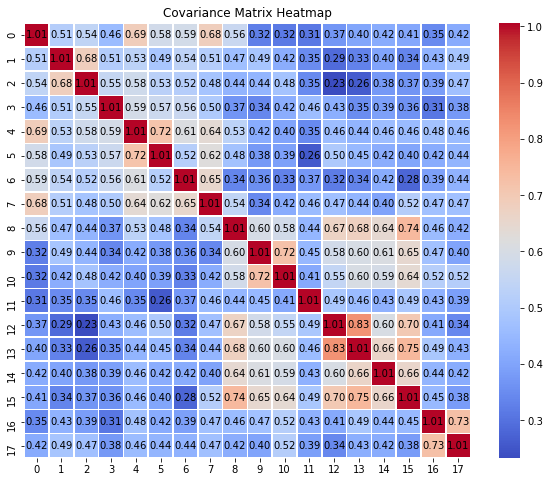

In [11]:
## Q2.2 Visualize the covariance matrix using a heat map, displaying all the values with 2 digits after the decimalpoint. (0.5%)

import seaborn as sns
import matplotlib.pyplot as plt


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)  # turn off Seaborn's annotations
plt.title("Covariance Matrix Heatmap")

# Add custom annotations
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(cov_matrix[i, j]),
                 horizontalalignment='center', verticalalignment='center', color="black")

plt.show()

## Q3. (1%)
*### Compute the eigenvalues and eigenvectors.*

In [12]:
## Q3.1 Compute the eigenvalues and eigenvectors. (0.4%)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [9.11980671 2.0168779  1.10011158 0.86338816 0.79587304 0.63678142
 0.52252557 0.11863577 0.43724067 0.41756592 0.37426525 0.16701128
 0.31305899 0.29489436 0.278798   0.20721947 0.22589829 0.22397164]
Eigenvectors: [[-2.31592599e-01  2.60671462e-01 -2.66541289e-01  1.01730539e-01
  -2.03179559e-01 -3.84183396e-01  1.14810165e-03 -2.06154024e-01
  -3.88535160e-02  1.99013516e-01  2.37632262e-02 -9.57941008e-03
  -5.15274931e-01  1.38895377e-01  2.00935409e-01 -2.53693854e-01
  -3.60390623e-01 -6.67282374e-02]
 [-2.25607323e-01  2.42135850e-01  2.31839279e-01 -3.15606275e-01
  -9.95181914e-02 -1.78808451e-01 -3.59257690e-02 -1.71320913e-01
  -3.36421900e-01 -5.52531596e-01 -2.54507735e-01 -7.64859028e-02
   1.41916936e-01 -1.72134758e-01  1.71415480e-01  2.02389583e-01
  -1.64395318e-01 -1.68405412e-01]
 [-2.22989574e-01  2.79274703e-01  2.10216490e-01 -4.02776290e-01
  -1.13083104e-01 -7.15028723e-02 -2.59075157e-01  1.09479702e-01
  -2.56053074e-02  1.77763616e-01  1.1276

In [13]:
## Q3.2 Sort the eigenvalues and eigenvectors. (0.2%)

# Pair eigenvalues with their corresponding eigenvectors
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

# Sort the pairs from high to low 
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [14]:
## Q3.3 Display the sorted eigenvalues and eigenvectors in tables or in the dataframe format. (0.4%)

# Separate the eigenvalues and eigenvectors
sorted_eigenvalues = np.array([pair[0] for pair in eigen_pairs])
sorted_eigenvectors = np.array([pair[1] for pair in eigen_pairs]).T

# Create a DataFrame to display eigenvalues and the first few elements of each eigenvector
eigenvalues_df = pd.DataFrame(sorted_eigenvalues, columns=['Eigenvalue'])
for i in range(sorted_eigenvectors.shape[1]):
    eigenvalues_df[f'Eigenvector_{i+1}'] = sorted_eigenvectors[:, i]

print(eigenvalues_df) 

    Eigenvalue  Eigenvector_1  Eigenvector_2  Eigenvector_3  Eigenvector_4  \
0     9.119807      -0.231593       0.260671      -0.266541       0.101731   
1     2.016878      -0.225607       0.242136       0.231839      -0.315606   
2     1.100112      -0.222990       0.279275       0.210216      -0.402776   
3     0.863388      -0.219565       0.222637      -0.093143      -0.238918   
4     0.795873      -0.254306       0.241967      -0.186280       0.074018   
5     0.636781      -0.237980       0.213209      -0.229616       0.105686   
6     0.522526      -0.219786       0.314741      -0.054257       0.039528   
7     0.437241      -0.249645       0.201626      -0.186355       0.257406   
8     0.417566      -0.260816      -0.186848      -0.153760      -0.033397   
9     0.374265      -0.238601      -0.243609       0.185995      -0.338955   
10    0.313059      -0.242294      -0.217981       0.259309      -0.220423   
11    0.294894      -0.202334      -0.099991       0.097577     

## Q4. (1%)
### Create scree plots to determine the optimal number of the PCA.

In [15]:
## Q4.1 Compute the proportional variance explained by each component. (0.3%)
# Calculate the total variance (sum of eigenvalues)
total_variance = sum(sorted_eigenvalues)

# Compute the proportional variance explained by each eigenvalue
proportional_variance_explained = [(i / total_variance) for i in sorted_eigenvalues]

# Display the proportional variance explained
proportional_variance_explained


[0.5034694132692774,
 0.11134406303232898,
 0.06073292466674701,
 0.0476643359239708,
 0.04393708632520403,
 0.035154250557042896,
 0.02884662477382389,
 0.02413837397206794,
 0.023052206480631988,
 0.020661743533704383,
 0.01728278130312576,
 0.01627998232549907,
 0.015391364002894321,
 0.012470974928337892,
 0.012364611632191339,
 0.01143978925146905,
 0.00922004977674216,
 0.006549424244941095]

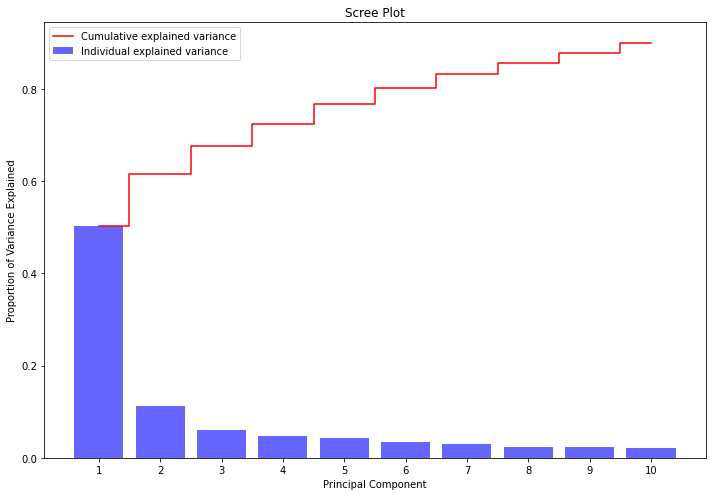

In [16]:
## Q4.2 Create scree plots setting the number of components of 10. (0.3%)
# Number of components
num_components = 10

# Proportional variance explained by each of the first 10 components
proportional_variance_explained = [(i / total_variance) for i in sorted_eigenvalues[:num_components]]

# Cumulative variance explained
cumulative_variance_explained = np.cumsum(proportional_variance_explained)

# Create the scree plot
plt.figure(figsize=(10, 7))
plt.bar(range(1, num_components + 1), proportional_variance_explained, alpha=0.6, color='b',
        label='Individual explained variance')
plt.step(range(1, num_components + 1), cumulative_variance_explained, where='mid', color='r',
         label='Cumulative explained variance')

# Add labels and title
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, num_components + 1))
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
from sklearn.decomposition import PCA

# Set the number of components to 3 based on your scree plot analysis
n_components = 3

# Initialize PCA with the optimal number of components
pca = PCA(n_components=n_components)

# Fit the PCA on the standardized attitude features
pca_subset = pca.fit_transform(subset_clean[attitude_columns])

# The PCA model is now fitted to your data, and pca_subset contains the transformed data
# Create a DataFrame with the PCA results for easier interpretation and analysis
pca_df = pd.DataFrame(data=pca_subset, columns=[f'PC{i+1}' for i in range(n_components)])

# If you want to merge this back with your original data:
# Assuming 'UserID' is in the index or a column in your original subset_clean DataFrame,
# You can concatenate the PCA results back with the original 'UserID' for further analysis
final_df = pd.concat([subset_clean.reset_index(drop=True), pca_df], axis=1)

# Display the first few rows of the final DataFrame
print(final_df.head())

        UserID  Attitude_1  Attitude_2  Attitude_3  Attitude_4  Attitude_5  \
0  formal10_01    1.006581    0.706086    0.702421    0.761092    0.810314   
1  formal10_03   -0.305275    0.706086    0.702421    0.761092    0.810314   
2  formal10_04   -0.305275   -0.853187   -0.659591   -0.359405   -0.360958   
3  formal11_01   -0.305275   -0.853187   -0.659591   -0.359405   -0.360958   
4  formal11_04   -0.305275   -0.853187   -0.659591   -0.359405   -1.532231   

   Attitude_6  Attitude_7  Attitude_8  Attitude_9  Attitude_10  Attitude_11  \
0    0.883681    0.717137    0.805445   -0.725389    -1.340721     0.006776   
1    0.883681    0.717137    0.805445    1.229472     0.963869     1.084104   
2   -0.258638    0.717137    0.805445    0.252042    -0.188426     0.006776   
3   -0.258638   -0.866541   -0.391431    0.252042    -0.188426     0.006776   
4   -0.258638   -2.450219   -1.588308    0.252042    -0.188426     0.006776   

   Attitude_12  Attitude_13  Attitude_14  Attitude_15  A

## Q5. (1%)
### Name the components according to the high loading values and save your data.

In [18]:
## Q5.1 Name the components according to the features with the high loading values within each component (0.6%)

loadings = pca.components_.T  # Transpose so rows correspond to features

# Create a DataFrame of loadings with feature names
loadings_df = pd.DataFrame(loadings, index=attitude_columns, columns=[f'Component {i+1}' for i in range(loadings.shape[1])])

# Interpret components based on highest loadings
for i, component in enumerate(loadings_df.columns):
    # Get features with the highest absolute loadings for the component
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f'{component} is mostly associated with: {top_features}')

Component 1 is mostly associated with: ['Attitude_9', 'Attitude_5', 'Attitude_16']
Component 2 is mostly associated with: ['Attitude_14', 'Attitude_7', 'Attitude_16']
Component 3 is mostly associated with: ['Attitude_18', 'Attitude_17', 'Attitude_13']


In [19]:
component_names = {
    'PC1': 'Overall Performnace',
    'PC2': 'Prefer Cristina',
    'PC3': 'Helpful Tutoring System',
}

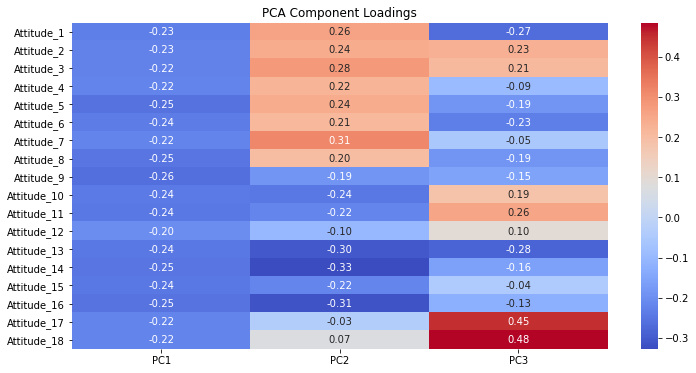

In [20]:
loadings = pca.components_

# Create a DataFrame with loading values, rows are components, columns are original features
loading_matrix = pd.DataFrame(loadings.T, index=attitude_columns, columns=['PC1', 'PC2', 'PC3'])

# Visualize the loading matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('PCA Component Loadings')
plt.show()

In [21]:
## Q5.2 Add the components to the dataframe df (0.3%)

# Reset the index of the original DataFrame for a proper merge
subset_clean_reset = subset_clean.reset_index(drop=True)

# Rename columns of pca_df according to your defined component names
pca_df_renamed = pca_df.rename(columns=component_names)

# Concatenate the original DataFrame with the PCA results
final_df = pd.concat([subset_clean_reset, pca_df_renamed], axis=1)

# Display the first few rows of the new DataFrame to verify the addition of PCA components
print(final_df.head())

        UserID  Attitude_1  Attitude_2  Attitude_3  Attitude_4  Attitude_5  \
0  formal10_01    1.006581    0.706086    0.702421    0.761092    0.810314   
1  formal10_03   -0.305275    0.706086    0.702421    0.761092    0.810314   
2  formal10_04   -0.305275   -0.853187   -0.659591   -0.359405   -0.360958   
3  formal11_01   -0.305275   -0.853187   -0.659591   -0.359405   -0.360958   
4  formal11_04   -0.305275   -0.853187   -0.659591   -0.359405   -1.532231   

   Attitude_6  Attitude_7  Attitude_8  Attitude_9  Attitude_10  Attitude_11  \
0    0.883681    0.717137    0.805445   -0.725389    -1.340721     0.006776   
1    0.883681    0.717137    0.805445    1.229472     0.963869     1.084104   
2   -0.258638    0.717137    0.805445    0.252042    -0.188426     0.006776   
3   -0.258638   -0.866541   -0.391431    0.252042    -0.188426     0.006776   
4   -0.258638   -2.450219   -1.588308    0.252042    -0.188426     0.006776   

   Attitude_12  Attitude_13  Attitude_14  Attitude_15  A

In [22]:
## Q5.2 Save the dataset as "Summary_survey.csv." (0.1%)
final_df.to_csv('Summary_survey_v2.csv', index=False)

## Bonus. (0.1%) Create 3D PCA biplots.

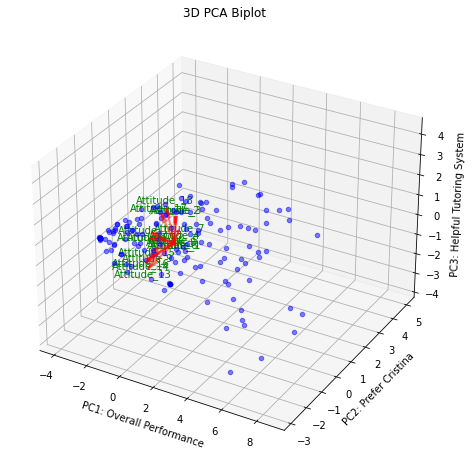

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each data point in the PCA-transformed subset
for i in range(len(pca_subset)):
    ax.scatter(pca_subset[i, 0], pca_subset[i, 1], pca_subset[i, 2], 
               color='b', alpha=0.5)
    
# Setting labels and titles
ax.set_xlabel("PC1: Overall Performance")
ax.set_ylabel("PC2: Prefer Cristina")
ax.set_zlabel("PC3: Helpful Tutoring System")
ax.set_title("3D PCA Biplot")

# Plotting the loadings (PCA component loadings)
loadings = pca.components_.T * 3  # Scale loadings for visibility
for i, feature in enumerate(attitude_columns):
    ax.quiver(0, 0, 0, loadings[i, 0], loadings[i, 1], loadings[i, 2], 
              color='r', alpha=0.5, lw=2)
    ax.text(loadings[i, 0]*1.2, loadings[i, 1]*1.2, loadings[i, 2]*1.2, feature, color='g', ha='center', va='center')

# Show plot
plt.show()